### Expression Evalution

In [1]:
x = int(input())

1


In [2]:
%%timeit
expr = 5*x**4 +12*x**3 + 4*x**2 + 6*x + 7

598 ns ± 7.18 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [26]:
%%timeit
expr = 5*pow(x,4) +12*pow(x,3) + 4*pow(x,2) + 6*x + 7

15.3 µs ± 452 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [3]:
%%timeit
expr = 7 + x*(x*(x*(5*x+12)+4)+6)

105 ns ± 1.86 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [4]:
import sympy as sp
from sympy.abc import x

In [13]:
expr = 5*x**4 +12*x**3 + 4*x**2 + 6*x + 7
expr

5*x**4 + 12*x**3 + 4*x**2 + 6*x + 7

In [25]:
expr.subs(x,1)

34

### Cache Usage

In [5]:
from functools import lru_cache

@lru_cache
def fib(n):
    if n < 2:
        return n
    else:
        return fib(n-1) + fib(n-2)

In [6]:
%%time
fib(10)

CPU times: total: 0 ns
Wall time: 0 ns


55

### Data Generation

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv(r"C:\Jntuk Works\MySql Programs\Csv Files Used\Student Details.csv")

In [9]:
df.head()

,roll,name,gen,Aadhar No,dob,xxx,ph
0,20021A0501,ANUMALISETTI MOKSHA SREE,FEMALE,7.565584e+11,08-06-2003,mokhasree@gmail.com,7702251684
1,20021A0502,BODDEPALLI LAVANYA,FEMALE,2.945021e+11,07-02-2003,lavanyaboddepalli723@gmail.com,9182238630
2,20021A0503,CHANDU LALITHA HARINI,FEMALE,8.937309e+11,21-10-2002,chanduharini02@gmail.com,9381316171
3,20021A0504,DALIA BHANU JINAGAM,FEMALE,8.541082e+11,23-12-2002,jinagamdaliabhanu@gmail.com,6302363417
4,20021A0505,GADE SRUJANA GAYATHRI,FEMALE,2.907998e+11,04-04-2003,srujanagayathrigade2003@gmail.com,9502065444


In [10]:
lst = []
for index,row in df.iterrows():
    dic = {'Roll_No': row['roll'],
     'Student_Name': row['name'].upper(),
     'Birth_Date':row['dob']}
    lst.append(dic)

In [27]:
from pprint import pprint
pprint(lst[:2])

[{'Birth_Date': '08-06-2003',
  'Roll_No': '20021A0501',
  'Student_Name': 'ANUMALISETTI MOKSHA SREE'},
 {'Birth_Date': '07-02-2003',
  'Roll_No': '20021A0502',
  'Student_Name': 'BODDEPALLI LAVANYA '}]


### Counting Vowels Using Dictionaries

In [2]:
word = input('Enter a string :')
letters = len(word)
vowels = 0
di = {}
for i in word:
    if i in di:
        di[i] += 1
    else:
        di[i] = 1
print(di)
for i in di:
    if i in 'aeiou':
        vowels += di[i]
print('No.of Letters :',letters)
print('No.of Vowels  :',vowels)
print('Perc of vowels:',(vowels/letters)*100)

Enter a string :ajay
{'a': 2, 'j': 1, 'y': 1}
No.of Letters : 4
No.of Vowels  : 2
Perc of vowels: 50.0


### Finding Winner

In [1]:
from collections import Counter, defaultdict

votes = ['Kenny', 'Amanda', 'John' ,'Vicky', 'Alex',
         'Amanda', 'John', 'Alex','Kenny', 'Vicky',
         'Charles', 'Alex', 'Kenny', 'Eric','Charles',
         'Eric', 'Laura', 'Michelle', 'Eric', 'Vicky']


ages = {
    'Alex':79,
    'Kenny':61,
    'Amanda':54,
    'John':80,
    'Vicky':34,
    'Eric':50,
    'Laura':55,
    'Michelle':42,
    'Charles':70
}

In [2]:
name_count = Counter(votes)
name_count

Counter({'Kenny': 3,
         'Amanda': 2,
         'John': 2,
         'Vicky': 3,
         'Alex': 3,
         'Charles': 2,
         'Eric': 3,
         'Laura': 1,
         'Michelle': 1})

In [3]:
top_votes = max(name_count.values())
top_scores = {k:v for k,v in name_count.items() if v == top_votes}
top_scores

{'Kenny': 3, 'Vicky': 3, 'Alex': 3, 'Eric': 3}

In [4]:
winner = max(top_scores.keys(), key=lambda x:ages[x])
winner

'Alex'

In [17]:
import timeit 


setup = '''
from collections import Counter, defaultdict

votes = ['Kenny', 'Amanda', 'John' ,'Vicky', 'Alex',
         'Amanda', 'John', 'Alex','Kenny', 'Vicky',
         'Charles', 'Alex', 'Kenny', 'Eric','Charles',
         'Eric', 'Laura', 'Michelle', 'Eric', 'Vicky']

ages = {'Alex':79, 'Kenny':61, 'Amanda':54, 'John':80,
        'Vicky':34, 'Eric':50, 'Laura':55, 'Michelle':42,
        'Charles':70}
'''
  
stmt_one = ''' 
name_count = Counter(votes)
top_votes = max(name_count.values())
top_scores = {k:v for k,v in name_count.items() if v == top_votes}
winner = max(top_scores.keys(), key=lambda x:ages[x])
'''


stmt_two = '''
f={}
g=Counter (votes)
gm=max(g.values())
for i in g:
    if g[i]==gm:
        f[i]=ages[i]
fm=max(f.values())
for i in f:
    if f[i]==fm:
        continue
'''


stmt_three = '''
name_count = Counter(votes)
count_names = defaultdict(list)
for name,count in name_count.items():
    count_names[count].append(name)
count,canditates = max(count_names.items())
winner = max(canditates,key=lambda x:ages[x])
'''

In [52]:
timeit.timeit(setup = setup, 
                    stmt = stmt_one,
                    number = 10000)

0.04922919999808073

In [53]:
timeit.timeit(setup = setup, 
                    stmt = stmt_two,
                    number = 10000)

0.04489700001431629

In [54]:
timeit.timeit(setup = setup, 
                    stmt = stmt_three,
                    number = 10000)

0.05191890004789457

### Quick Sort

In [14]:
def partition(arr, l, h):
    i = l - 1
    x = arr[h]

    for j in range(l, h):
        if arr[j] <= x:
            i = i + 1
            arr[i], arr[j] = arr[j], arr[i]

    arr[i + 1], arr[h] = arr[h], arr[i + 1]
    return i + 1

In [15]:
from collections import deque

def quickSort(arr, l, h):

    stack = deque()
    stack.append(l)
    stack.append(h)
    print(stack)

    while len(stack) > 0:
        h = stack.pop()
        l = stack.pop()
        pos = partition(arr, l, h)

        if pos-1 > l:
            stack.append(l)
            stack.append(pos-1)

        if pos + 1 < h:
            stack.append(pos+1)
            stack.append(h)

In [16]:
lst = [4, 3, 5, 2, 1, 3, 2, 3]
n = len(lst)
quickSort(lst, 0, n-1)
print ("Sorted array is :",*lst)

deque([0, 7])
Sorted array is : 1 2 2 3 3 3 4 5


### Mid-II

In [1]:
def areaOfCircle(r):
    print(f'Area of Circle is {3.14 * r * r}')
def areaOfTraingle(b, h):
    print(f'Area of Traingle is {0.5 * b * h}')
def areaOfRectangle(l, h):
    print(f'Area of Rectangle is {2 * l * h}')
def areaOfSquare(s):
    print(f'Area of Square is {s * s}')
def areaOfPyramid(bp, ba):
    print(f'Area of Pyramid is {0.5 * bp + ba }')


print('1. Area of Circle')
print('2. Area of Triangle')
print('3. Area of Rectangle')
print('4. Area of Square')
print('5. Area of Pyramid')

choice = int(input('Enter Your Choice : '))
if choice == 1:
    radius = int(input('Enter Radius of Circle : '))
    areaOfCircle(radius)
elif choice == 2:
    base = int(input('Enter Base of Triangle : '))
    height = int(input('Enter Height of Triangle : '))
    areaOfTraingle(base, height)
elif choice == 3:
    length = int(input('Enter Height of Rectangle : '))
    height = int(input('Enter Breadth of Rectangle : '))
    areaOfRectangle(length, height)
elif choice == 4:
    side = int(input('Enter Side of Square :'))
    areaOfSquare(side)
elif choice == 5:
    bperimeter = int(input('Enter Base Perimeter of Pyramid :'))
    barea = int(input('Enter Base Area of Pyramid :'))
    areaOfPyramid(bperimeter, barea)
else:
    print('Choose from 1 - 5')

1. Area of Circle
2. Area of Triangle
3. Area of Rectangle
4. Area of Square
5. Area of Pyramid
Enter Your Choice : 2
Enter Base of Triangle : 2
Enter Height of Triangle : 2
Area of Traingle is 2.0


In [2]:
txtfile = input('Enter Text File : ')
f = open(txtfile, 'r')
text = f.read()
f.close()
modified_text = text.upper()
f = open(txtfile, 'w')
f.write(modified_text)
f.close()
print('Converted SucessFully')

Enter Text File : Sample File.txt
Converted SucessFully


In [9]:
class Parent:
    variable = 'I can accesesed by super() function'
    def __init__(self):
        print('Parent Class Constructor')
    def method(self):
        print('I can invoked by super() function')

        
class Child(Parent):
    def show(self):
        super().method()
        print(super().variable)


c = Child()
c.show()

Parent Class Constructor
I can invoked by super() function
I can accesesed by super() function


In [12]:
num = int(input('Enter a Divisor : '))
try:
    5 / num
except ZeroDivisionError:
    print('Cant Divide With 0(Zero)')
else:
    print('No Error Occured')
finally:
    print('I Get Executed Every Time')

Enter a Divisor : 0
Cant Divide With 0(Zero)
I Get Executed Every Time


In [29]:
from tkinter import *

root = Tk()
root.geometry('200x100')
label = Label(text='Hello World',font=('Helvetica', 20, 'bold'))
label.place(x=25,y=30)
root.mainloop()

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Students enrolled in different courses')

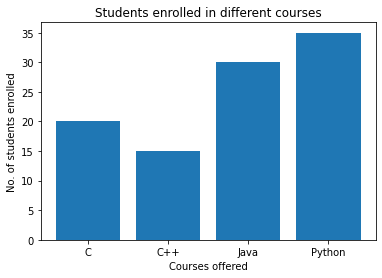

In [2]:
data = {'C':20, 'C++':15, 'Java':30,'Python':35}
courses = list(data.keys())
values = list(data.values())

plt.bar(courses,values)
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")

Text(0.5, 1.0, 'Students enrolled in different courses')

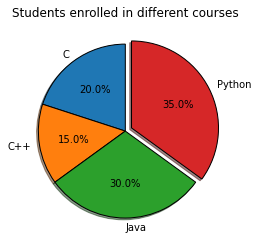

In [7]:
data = {'C':20, 'C++':15, 'Java':30,'Python':35}
labels = list(data.keys())
slices = list(data.values())
explode = [0, 0, 0, 0.08]
plt.pie(slices, labels=labels, explode=explode, shadow=True,
        startangle=90, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.title("Students enrolled in different courses")

Text(0.5, 1.0, 'Sample Histogram')

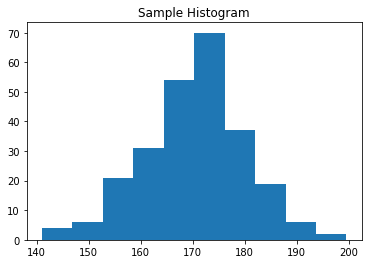

In [10]:
data =  np.random.normal(170, 10, 250)
plt.hist(data)
plt.title("Sample Histogram")

Text(0.5, 1.0, 'Scatter Plot')

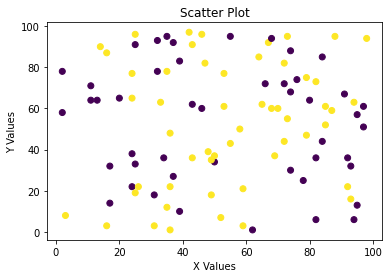

In [27]:
x = np.random.randint(1,100,size=(100,))
y = np.random.randint(1,100,size=(100,))
labels = np.random.randint(0,2,size=(100,))
                           
plt.scatter(x,y,c=labels)
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Scatter Plot")

In [37]:
%%html
<h1><center>CHI-SQARE FORMULA</center></h1>
<br>
<center><img src='https://lh4.googleusercontent.com/T23mE6ZOaj1hLiB9-sLsHCxD2awZln2muHxYQHiqld75f6cAN9-I9PFMrm1Zy4h-XWY8xuYsrYu_1WLukLk_6yR8ncDC9xNR1moDGxtqohVcY43oui1RBbKLkdwkFqMGE9YOUDJ7'>
</center>

In [ ]:
observed = list(map(int,input('Enter Observed Values :')))
expected = list(map(int,input('Enter Expected Values :')))

chi_square = 0
for o,e in zip(observed,expected):
    chi_square += (((o - e) ** 2) / e)
print(chi_square)